**Import Libraries**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

**Load Dataset**

In [40]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA (Exploratory Data Analysis)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [42]:
# rename the columns for easy use
df2=df.rename({'R&D Spend':'RDS','Administration':'AD','Marketing Spend':'MS','State':'ST','Profit':'PF'},axis=1)
df2

,RDS,AD,MS,ST,PF
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
# searching for duplicated values
df2[df2.duplicated()]

,RDS,AD,MS,ST,PF


**No Duplicated values found**

In [44]:
df2.describe()

,RDS,AD,MS,PF
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation

In [45]:
df2.corr()

,RDS,AD,MS,PF
RDS,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
PF,0.972900,0.200717,0.747766,1.000000


# pairplot

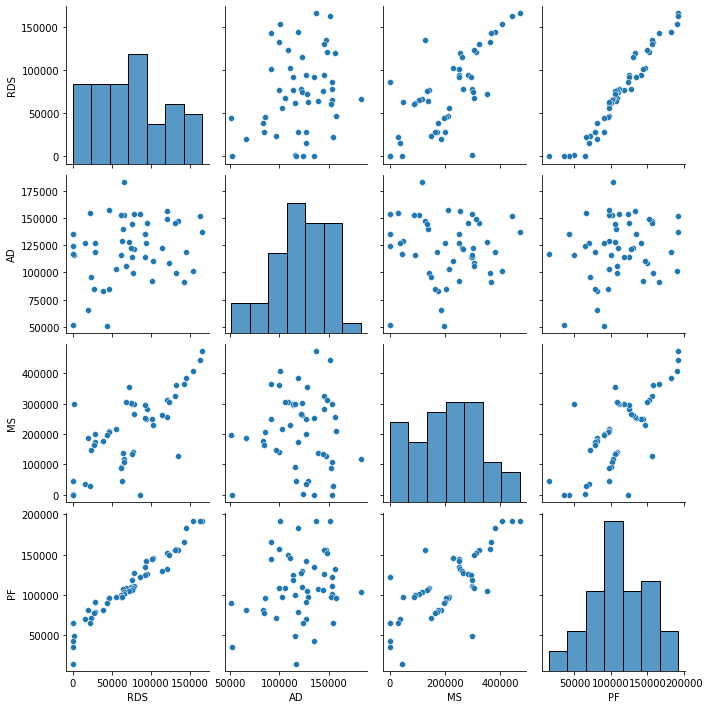

In [46]:
sb.pairplot(df2)

# Build a Model

In [47]:
model=smf.ols('PF~RDS+AD+MS',data=df2).fit()

# Model Testing

In [48]:
# finding co-efficient parameters
model.params

Intercept    50122.192990
RDS              0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [49]:
# find tvalues & pvalues
np.round(model.tvalues,4), np.round(model.pvalues,4)

(Intercept     7.6262
 RDS          17.8464
 AD           -0.5255
 MS            1.6551
 dtype: float64, Intercept    0.0000
 RDS          0.0000
 AD           0.6018
 MS           0.1047
 dtype: float64)

**pvalues which are >0.05 are considered as INSIGNIFICANT (where AD,MS are Insignificant)**

In [50]:
# R2 value
model.rsquared

0.9507459940683246

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        11:28:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**from the above summary we can know the values of (R2, adjR2, coefficient parameters, tvalues, pvalues etc)**

# Build SLR & MLR model for Insignificant Variables 'AD & MS'

In [52]:
slr_ad=smf.ols('PF~AD',data=df2).fit()
slr_ad.tvalues, slr_ad.pvalues

(Intercept    3.040044
 AD           1.419493
 dtype: float64, Intercept    0.003824
 AD           0.162217
 dtype: float64)

**AD is Insignificant when calculated indivudually**

In [53]:
slr_ms=smf.ols('PF~MS',data=df2).fit()
slr_ms.tvalues, slr_ms.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64, Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

**MS is Significant when calculated indivudually**

In [54]:
mlr=smf.ols('PF~AD+MS',data=df2).fit()
mlr.tvalues, mlr.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64, Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

**Both CC & Doors are Significant, so these are important to predict the data**

# VIF (Variance Inflation Factor)

In [55]:
# VIF=(1/1-R2) calculate for all independent variables

rsq_rds=smf.ols('RDS~AD+MS',data=df2).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_ad=smf.ols('AD~RDS+MS',data=df2).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_ms=smf.ols('MS~RDS+AD',data=df2).fit().rsquared
vif_ms=1/(1-rsq_ms)

# storing VIF values in DataFrame
d1={'Variables':['RDS','AD','MS'],
    'VIF':[vif_rds,vif_ad,vif_ms]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,VIF
0,RDS,2.468903
1,AD,1.175091
2,MS,2.326773


**None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation**

# Model Validation Techniques

**1) Test for Normality of Residuals [QQ (Quantiles) plots]**

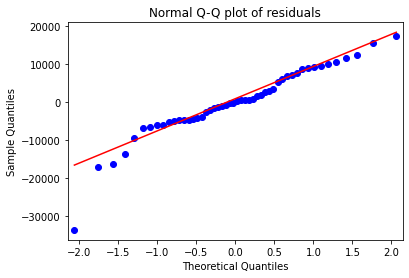

In [56]:
qqplot=sm.qqplot(model.resid,line='q')
# 'q' - a line which fits through the quartiles
# line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [57]:
# to improve the performance of your model, remove the outliers
list(np.where(model.resid<-30000))

[array([49])]

**2) Residual Plot for Homoscedasticity**

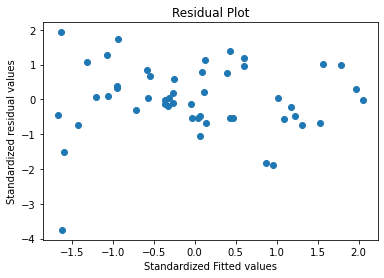

In [58]:
# z = (x - mu)/sigma
def get_standardized_values(vals):return (vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

**3) Residual Vs Regressor Plots**

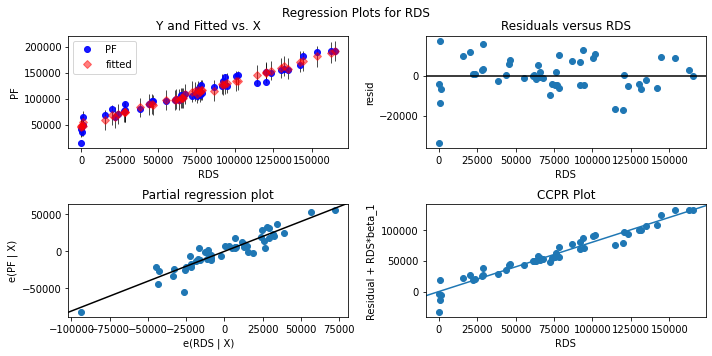

In [59]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

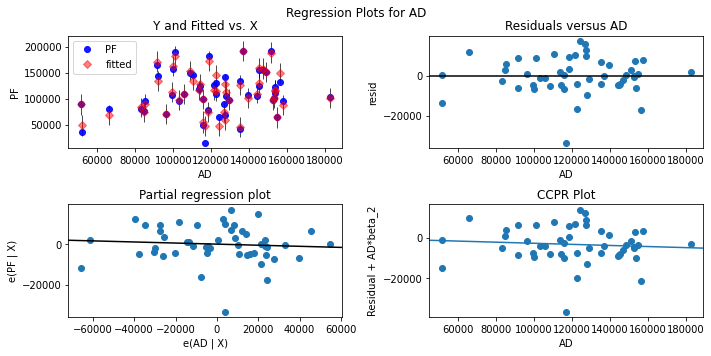

In [60]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "AD", fig=fig)
plt.show()

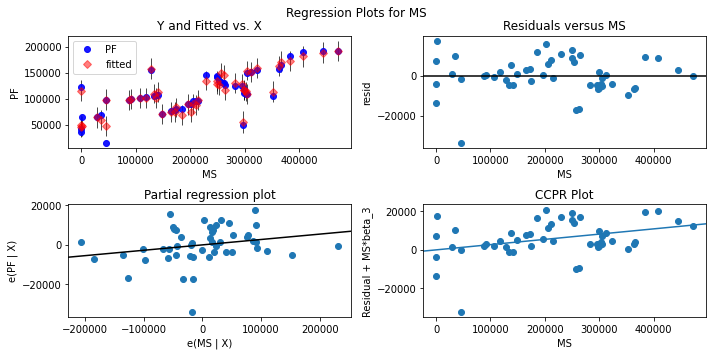

In [61]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics

**Cross verify the presence of influencing observations by 2 methods to spot 'Outliers/Infuencers'**

**1) Cook's Distance**

<ipython-input-62-a0db5e56b6b2>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(df2)), np.round(c, 3))


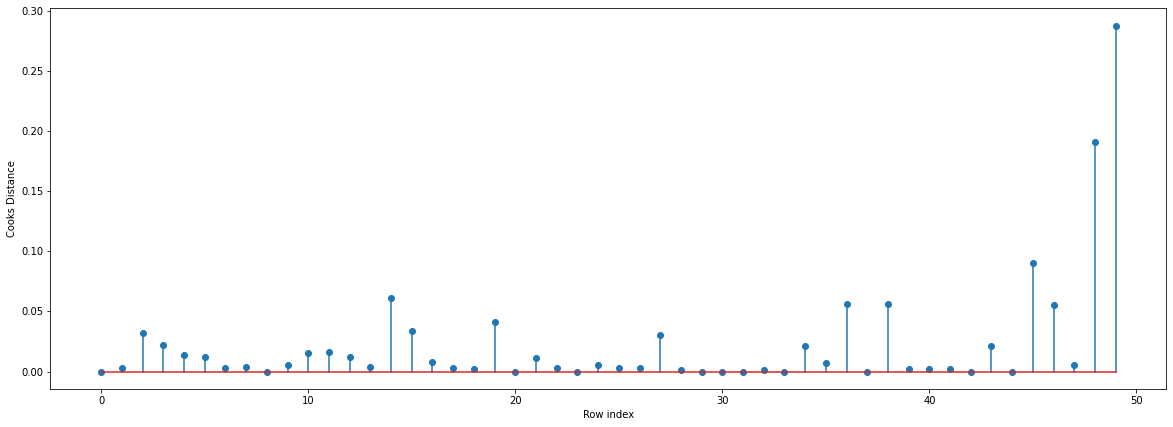

In [62]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [63]:
#index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

**2) Leverage Value**

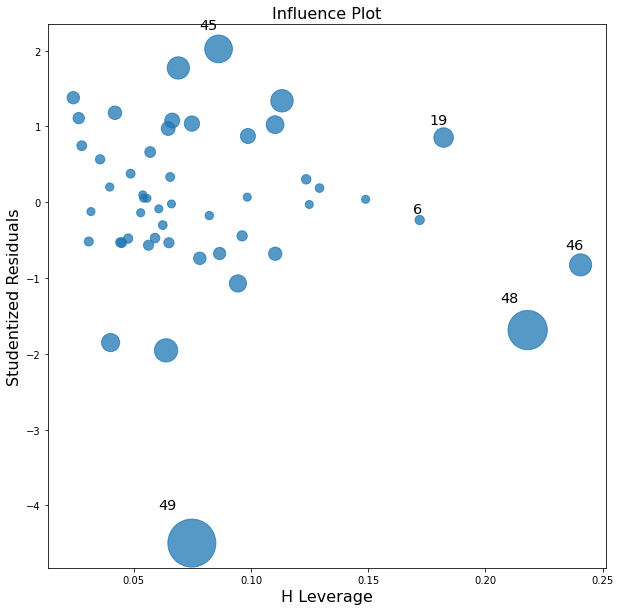

In [64]:
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax=ax)

In [65]:
# manual calculation
# cutoff value = 3(k+1)/n = 3(5+1)/50 = 0.36, where k= no of Features, n= no of Observations
k=df2.shape[1]
n=df2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [66]:
df2[df2.index.isin([49])]

,RDS,AD,MS,ST,PF
49,0.0,116983.8,45173.06,California,14681.4


# Improve the Model

In [67]:
# discard the data points which are influencers and re-assign the row number
df3=df2.drop(df2.index[[49]],axis=0).reset_index(drop=True)
df3


,RDS,AD,MS,ST,PF
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**Final Model**

In [68]:
# final model R2 value
final_model=smf.ols('PF~RDS+AD+MS',data=df3).fit()
final_model.rsquared

0.9613162435129848

# Predicting The New Model

In [69]:
new_data=pd.DataFrame({'RDS':60000,'AD':80000,'MS':150000},index=[0])
new_data

,RDS,AD,MS
0,60000,80000,150000


In [70]:
final_model.predict(new_data)

0    101371.485949
dtype: float64

In [71]:
pred_price=final_model.predict(df3)
pred_price

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64